In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

ames_raw = pd.read_csv('Ames_HousePrice.csv', index_col=0)
ames_raw.shape

(2580, 81)

In [23]:
ames_raw.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [113]:
#Simple Linear Regression, fit simple linear model for every variable

col = 'SaleCondition' #I manually looped these to catch errors individually as they came up.

y = ames_raw[['SalePrice']]
reg = LinearRegression()

X = ames_raw[[col]]
    
reg.fit(X, y)
print(f" {col}: {reg.score(X, y)}")

ValueError: could not convert string to float: 'Normal'

PID: 0.05120099648251408  
!GrLivArea: 0.5183732056699006  
MSSubClass: 0.007155008656742345  
MSZoning: VE  
'LotFrontage': NaN's  
'LotArea': .07531921127368835  
Street: VE  
Alley: VE  
'LotShape': VE  
'LandContour': VE  
'Utilities': VE  
'LotConfig': VE  
'LandSlope': VE  
'Neighborhood': VE  
'Condition1': VE  
'Condition2': VE  
'BldgType': VE  
'HouseStyle': VE  
!! OverallQual: 0.6248925373371652  
OverallCond: 0.010219487984851061  
YearBuilt: 0.2963386692622052  
YearRemodAdd: 0.2645135075446048  
'RoofStyle': VE  
'RoofMatl': VE  
'Exterior1st': VE  
'Exterior2nd': VE  
'MasVnrType': VE  
'ExterQual': VE  
'ExterCond': VE  
'Foundation': VE  
'BsmtQual': VE  
'BsmtCond': VE  
'BsmtExposure': VE  
'BsmtFinType1': VE  
'BsmtFinSF1': NaN's
'BsmtFinType2': VE  
'BsmtFinSF2': NaN's
'BsmtUnfSF': NaN's
'TotalBsmtSF': NaN's
'Heating': VE  
'HeatingQC': VE  
'CentralAir': VE  
'Electrical': VE  
 1stFlrSF: 0.4129516427126516  
 2ndFlrSF: 0.06924468617633406  
 LowQualFinSF: 0.00095079438633483  
 'BsmtFullBath': NaN's
 'BsmtHalfBath': NaN's
 FullBath: 0.28620549197746115
 HalfBath: 0.08172451792098179
 BedroomAbvGr: 0.02304512827536065
 KitchenAbvGr: 0.01299070277321901
 'KitchenQual': VE  
 TotRmsAbvGrd: 0.24031508853002137
 'Functional': VE  
Fireplaces: 0.23832326199307086
'FireplaceQu': VE  
'GarageType': VE  
'GarageYrBlt': NaN's
'GarageFinish': VE  
'GarageCars': NaN's
'GarageArea': NaN's
'GarageQual': VE
'GarageCond': VE
'PavedDrive': VE
WoodDeckSF: 0.11104333043218384
OpenPorchSF: 0.09396687512928903
EnclosedPorch: 0.015186832015373852
3SsnPorch: 0.0009771955140200905
ScreenPorch: 0.01475335746883455
PoolArea: 0.0009513780180608888
'PoolQC': VE
'Fence': VE
'MiscFeature': VE
MiscVal: 0.0003563384769366129
MoSold: 0.00015852081570277843
YrSold: 1.8925326150665e-06
'SaleType': VE
'SaleCondition': VE


## First pass- reporting top R^2's: 
OverallQual: 0.6248925373371652 -- I am gravely concerned about this column. 'Overall Quality' is feature engineering already built into the dataset- a subjective human metric that would be incredibly difficult to keep consistent and evaluate over time. Not to mention its distribution, which is heavily weighted so that the majority of the homes are 'above average'. I can't deny its predictive power, but it's fishy to me and I suspect it would receive a lot of scrutiny in a professional setting. I bristle at the presentations where students report that to make a house cost more, you have to increase square footage and its 'overall quality'- which feels like a cop-out.

GrLivArea (above grade living area with R^2 of .5183732056699006)  
1stFlrSF: 0.4129516427126516  
YearBuilt: 0.2963386692622052  
FullBath: 0.28620549197746115  
YearRemodAdd: 0.2645135075446048  

In [168]:
#Look at columns- can drop in 'MSSubClass' too

y2 = ames_raw[['SalePrice']]
reg2 = LinearRegression()

for col in ames_raw.drop(columns = ['PID', 'SalePrice']).columns:

    if str(ames_raw[col].dtype) == 'object':

        x = ames_raw[[col]]
     
        x = pd.get_dummies(x, columns = [col], drop_first=True) #vs drop_first=False changes these values?
        
        x = x.replace({False: 0, True: 1})
        
        reg2.fit(x, y)
        
        print(f" {col}: {reg2.score(x, y2)}")

    else:
        pass

 MSZoning: 0.11600712743510999
 Street: 0.0025456399344537806
 Alley: 1.1122790402051663e-06
 LotShape: 0.09415497298779363
 LandContour: 0.03234993583246448
 Utilities: 0.0011604270772369585
 LotConfig: 0.021107163245754457
 LandSlope: 0.0063239454783983184
 Neighborhood: 0.5598077663859118
 Condition1: 0.04531604555423885
 Condition2: 0.024720008929335457
 BldgType: 0.03303709816401801
 HouseStyle: 0.07103279739739266
 RoofStyle: 0.05870948148127286
 RoofMatl: 0.020763632343995697
 Exterior1st: 0.15513439019561037
 Exterior2nd: 0.15380427767670357
 MasVnrType: 0.17102556348836406
 ExterQual: 0.4853009289061254
 ExterCond: 0.021968757422164087
 Foundation: 0.26713508906430017
 BsmtQual: 0.3162074986324529
 BsmtCond: 0.04840595199785991
 BsmtExposure: 0.14879901006583107
 BsmtFinType1: 0.21719133838158222
 BsmtFinType2: 0.017428007577154014
 Heating: 0.007934972875623836
 HeatingQC: 0.20235536653584862
 CentralAir: 0.06642840369204306
 Electrical: 0.0564879727663965
 KitchenQual: 0.457

In [138]:
x = ames_raw[['MSSubClass']]
     
x = pd.get_dummies(x, columns = ['MSSubClass'], drop_first=False)
        
x = x.replace({False: 0, True: 1})
        
reg2.fit(x, y)
        
print(f" 'MSSubClass': {reg2.score(x, y2)}")

 'MSSubClass': 0.2398439674330033


Of the non-numerical columns:   
 Neighborhood: 0.5597828887109129  
 ExterQual: 0.48500289777659467  
 BsmtQual: 0.4813818328427477  
 KitchenQual: 0.45734015822742424  

## *Columns with Missing Values (all numerical):*  
'LotFrontage'  
'BsmtFinSF1'   
'BsmtFinSF2'   
'BsmtUnfSF'   
'TotalBsmtSF'   
'BsmtFullBath'   
'BsmtHalfBath'   
'GarageYrBlt'   
'GarageCars'   
'GarageArea'  

### LotFrontage

In [140]:
#462 Rows with 'LotFrontage' NaNs

missingmask = ames_raw[ames_raw['LotFrontage'].isna()]
len(missingmask)

lot_traits = ['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LandContour', 'LotConfig']

for col in lot_traits:
    print(missingmask[col].value_counts(normalize=True))

#I don't see a compelling overall trend for buildings sold with missing 'LotFrontage' values.
#Missing Completely at Random? Is it possible to have a home without any lotfrontage?

MSSubClass
20     0.370130
60     0.277056
120    0.071429
80     0.064935
50     0.051948
90     0.036797
85     0.032468
160    0.028139
30     0.025974
70     0.021645
190    0.008658
75     0.004329
40     0.002165
180    0.002165
150    0.002165
Name: proportion, dtype: float64
MSZoning
RL         0.870130
RM         0.075758
FV         0.041126
RH         0.008658
I (all)    0.002165
C (all)    0.002165
Name: proportion, dtype: float64
LotArea
7500     0.010823
4426     0.008658
11000    0.008658
11250    0.008658
7750     0.008658
           ...   
11677    0.002165
6120     0.002165
12099    0.002165
11885    0.002165
8826     0.002165
Name: proportion, Length: 414, dtype: float64
LotShape
IR1    0.653680
Reg    0.277056
IR2    0.058442
IR3    0.010823
Name: proportion, dtype: float64
LandContour
Lvl    0.891775
Low    0.051948
Bnk    0.032468
HLS    0.023810
Name: proportion, dtype: float64
LotConfig
Inside     0.564935
Corner     0.205628
CulDSac    0.179654
FR2        0.0432

In [153]:
pd.set_option('display.max_columns', None)

neighborhood_mean_frontage = ames_raw.groupby('Neighborhood')['LotFrontage'].mean()

ames_raw['LotFrontage'] = ames_raw.apply(
    lambda row: neighborhood_mean_frontage[row['Neighborhood']] if\
    pd.isna(row['LotFrontage']) else row['LotFrontage'], axis = 1)
    
missingmask = ames_raw[ames_raw['LotFrontage'].isna()]
print(missingmask)

#These last remaining values are missing because there is no lot frontage recorded
#in these neighborhoods for us to take the average frontage!

#Impute the last three with mean
ames_raw['LotFrontage'] = ames_raw['LotFrontage'].fillna(ames_raw['LotFrontage'].mean())

           PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
110  916253320       1502     330000         120       RM          NaN   
684  916252170       1295     230000         120       RM          NaN   
205  907230240       1320     137000         160       RH          NaN   

     LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
110     9763   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
684     8239   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
205     3612   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   

    Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
110      GrnHill       Norm       Norm   TwnhsE     1Story            7   
684      GrnHill       Norm       Norm   TwnhsE     1Story            7   
205      Landmrk       Norm       Norm    Twnhs     2Story            6   

     OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
110  

In [155]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

X = ames_raw[['LotFrontage']]
    
reg.fit(X, y)
print(f" 'LotFrontage': {reg.score(X, y)}")
#imputing by neighborhood instead of imputing across the whole dataset brought the R^2 up\
#from .114 to .124 :\

 'LotFrontage': 0.12408330972516857


## 'Basement Square Footage'

In [156]:
mask = ames_raw['BsmtFinSF1'].isna()

ames_raw.loc[mask, ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = (0, 0, 0, 0)

#Observations with Nans in 'BsmtFinSF1' don't have basements: Impute with 0's

In [158]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    X = ames_raw[[col]]
    
    reg.fit(X, y)
    print(f"{col}: {reg.score(X, y)}")

#TotalBsmtSF!

BsmtFinSF1: 0.21258570280531774
BsmtFinSF2: 0.0005138356647375053
BsmtUnfSF: 0.028244021234264394
TotalBsmtSF: 0.42574893740677966


## Basement Bathrooms

In [160]:
mask = ames_raw['BsmtFullBath'].isna()

ames_raw[mask]
ames_raw.loc[mask, ['BsmtFullBath', 'BsmtHalfBath']] = (0, 0)

#NaN's for Full Bathrooms in Basement? It's because they don't have a basement. Impute 0's

In [161]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

for col in ['BsmtFullBath', 'BsmtHalfBath']:
    X = ames_raw[[col]]
    
    reg.fit(X, y)
    print(f"{col}: {reg.score(X, y)}")

BsmtFullBath: 0.08453860463050078
BsmtHalfBath: 0.0011414971693050058


## Garage

In [ ]:
'GarageYrBlt'
'GarageCars'
'GarageArea'

In [162]:
missingmask = ames_raw[ames_raw['GarageYrBlt'].isna()]
missingmask[missingmask['GarageType'] != 'None']
mask = (ames_raw['PID'] == 910201180)

ames_raw.loc[mask, ['GarageYrBlt', 'GarageArea']] = (ames_raw['GarageYrBlt'].mean(), ames_raw['GarageArea'].mean())

mask = (ames_raw['PID'] == 903426160)

ames_raw.loc[mask, 'GarageYrBlt'] = (ames_raw['GarageYrBlt'].mean())
#All remaining 'GarageYrBlt' NaNs are for houses without garages. Impute with 0 to retain data type of column
#ames_raw['GarageYrBlt'].isna()
ames_raw['GarageYrBlt'] = ames_raw['GarageYrBlt'].fillna(0)

In [166]:
ames_raw['GarageCars'] = ames_raw['GarageCars'].fillna(value = 0.0)

In [167]:
y = ames_raw[['SalePrice']]
reg = LinearRegression()

for col in ['GarageYrBlt', 'GarageCars', 'GarageArea']:
    X = ames_raw[[col]]
    
    reg.fit(X, y)
    print(f"{col}: {reg.score(X, y)}")

GarageYrBlt: 0.06073326732327766
GarageCars: 0.4075857726993316
GarageArea: 0.40319406184284


# R^2 from Simple Linear Regression: Top Ten

*1*. OverallQual: 0.6248925373371652 -- I am gravely concerned about this column. 'Overall Quality' is feature engineering already built into the dataset- a subjective human metric that would be incredibly difficult to evaluate consistently over time. How would different assessors rate a home on this metric? Not to mention its distribution, which is heavily weighted so that the majority of the homes are 'above average'. I can't deny its predictive power, but it's fishy to me and I suspect it would receive a lot of scrutiny in a professional setting. I bristle at the presentations where students report that to raise the asking price of your house, you have to increase square footage and its 'overall quality'- which feels like a cop-out.

*2*. Neighborhood: 0.5597828887109129  
*3*. GrLivArea: .5183732056699006  
*4*. ExterQual: 0.48500289777659467  
*5*. BsmtQual: 0.4813818328427477  
*6*. KitchenQual: 0.45734015822742424  
*7*. TotalBsmtSF: 0.42574893740677966  
*8*. 1stFlrSF: 0.4129516427126516  
*9*. GarageCars: 0.4075857726993316  
*10*.GarageArea: 0.40319406184284 (obviously highly correlated with GarageCars!)

## Clean up Missing Values

In [194]:
ames_raw.columns[ames_raw.isna().any()].tolist()

[]

In [171]:
#Alley
ames_raw['Alley'] = ames_raw['Alley'].fillna('None')

In [172]:
#Filter to where 'MasVnrType' is null and 'MasVnrArea' is NOT null:
missingmask = ames_raw[ames_raw['MasVnrType'].isna()]
missingmask[pd.notna(missingmask['MasVnrArea']) & missingmask['MasVnrArea'] != 0]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
115,534129230,1790,165150,60,RL,80.000000,10400,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,TA,TA,CBlock,TA,TA,No,Rec,247.0,Unf,0.0,485.0,732.0,GasA,Gd,Y,SBrkr,1012,778,0,1.0,0.0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2.0,484.0,TA,TA,Y,148,0,0,0,147,0,NaN,NaN,NaN,0,11,2006,WD,Normal
604,528138010,1808,324000,20,RL,102.000000,13514,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,NaN,285.0,Ex,TA,PConc,Ex,TA,No,GLQ,1142.0,Unf,0.0,632.0,1774.0,GasA,Ex,Y,SBrkr,1808,0,0,1.0,0.0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3.0,850.0,TA,TA,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,Normal
138,535106140,912,114500,20,RL,70.000000,10150,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456.0,Unf,0.0,456.0,912.0,GasA,Ex,Y,FuseA,912,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1.0,275.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal
231,527451110,1365,125000,160,RM,24.000000,2368,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765.0,Unf,0.0,0.0,765.0,GasA,TA,Y,SBrkr,765,600,0,0.0,0.0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2.0,440.0,TA,TA,Y,0,36,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
177,527166010,1983,225000,60,RL,73.362637,10762,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694.0,Unf,0.0,284.0,978.0,GasA,Ex,Y,SBrkr,1005,978,0,0.0,0.0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2.0,490.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
284,902427140,968,104500,20,RM,52.000000,8626,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,NaN,1.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
290,533352075,2620,190000,90,RL,75.388889,18890,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498.0,Rec,211.0,652.0,1361.0,GasA,Ex,Y,SBrkr,1361,1259,0,0.0,0.0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2.0,600.0,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal


In [173]:
#Where masonry is 1 sq ft? Remove, replace with 0
mask1 = (ames_raw['MasVnrType'].isna()) & (ames_raw['MasVnrArea'].notna()) & (ames_raw['MasVnrArea'] == 1)
ames_raw.loc[mask1, ['MasVnrType', 'MasVnrArea']] = ('None', 0)

In [174]:
#Where masonry is more than 1 sq ft? Retain, Impute MasVnrType with mode: 'BrkFace'
mask2 = (ames_raw['MasVnrType'].isna()) & (ames_raw['MasVnrArea'].notna()) & (ames_raw['MasVnrArea'] != 0)
ames_raw.loc[mask2, 'MasVnrType'] = 'BrkFace'

In [175]:
ames_raw['MasVnrType'] = ames_raw['MasVnrType'].fillna(value = 'None')

In [177]:
#MasVnrArea
missingmask = ames_raw[ames_raw['MasVnrArea'].isna()]
missingmask
#Masonry Veneer Area is Nan in these columns because 'MasVnrType' is exclusively 'None': Impute 0's

ames_raw['MasVnrArea'] = ames_raw['MasVnrArea'].fillna(0)

### Basement Values

In [179]:
mask = (ames_raw['BsmtQual'].isna() & ames_raw['BsmtFinSF1'].notna())
ames_raw.loc[mask, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = ('None', 'None',\
                                                                                              'None', 'None', 'None')

In [180]:
missingmask = ames_raw['BsmtQual'].isna()

ames_raw.loc[missingmask, ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']] = ('None', 'None',\
                                                                                              'None', 'None', 'None')

In [181]:
mask = ames_raw['BsmtExposure'].isna()
ames_raw.loc[mask, 'BsmtExposure'] = 'No'

In [182]:
mask = ames_raw['BsmtFinType2'].isna()
ames_raw.loc[mask, ['BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF']] = ('Unf', 479.0, 1603.0)

### Electrical

In [184]:
ames_raw['Electrical'] = ames_raw['Electrical'].fillna(value = 'SBrkr')

### Fireplace

In [185]:
mask = ames_raw['FireplaceQu'].isna()
ames_raw.loc[mask, 'FireplaceQu'] = 'None'

### Garage

In [187]:
missingmask = ames_raw['GarageType'].isna()
ames_raw.loc[missingmask, ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']] =\
    ('None', 'None', 'None', 'None')
#Where GarageType is NaN, all other Garage Attributes are 0 or NaN

In [188]:
mask = (ames_raw['PID'] == 910201180)

ames_raw.loc[mask, ['GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond']] =\
    ('Unf', 1, 'TA', 'TA')

In [189]:
mask = (ames_raw['PID'] == 903426160)

ames_raw.loc[mask, ['GarageFinish', 'GarageQual', 'GarageCond']] =\
    ('Unf', 'TA', 'TA')

### PoolQC, MiscFeature, Fence

In [191]:
mask = ames_raw['PoolQC'].isna() & ames_raw['PoolArea'].notna() & (ames_raw['PoolArea'] != 0)
ames_raw[mask]
#If PoolQC is missing, the square footage is listed as 0, safe to impute with 'None'

ames_raw['PoolQC'] = ames_raw['PoolQC'].fillna('None')

In [192]:
mask = ames_raw['MiscFeature'].isna() & ames_raw['MiscVal'].notna() & (ames_raw['MiscVal'] != 0)
ames_raw[mask]

#If MiscFeature is missing, there are no dangling 'MiscVal' values to complicate imputing with 'None'

ames_raw['MiscFeature'] = ames_raw['MiscFeature'].fillna('None')

In [193]:
ames_raw['Fence'] = ames_raw['Fence'].fillna('None')

## Implement Train-Test Split

In [195]:
ames = ames_raw.copy()

In [427]:
#But first, a little feature engineering.

ames['TotalBath'] = ames['BsmtFullBath'] + ames['FullBath'] +\
                       (ames.BsmtHalfBath * .5) + (ames.HalfBath * .5)

#Total Square Footage: Above Grade + Basement
ames['TotalSF'] = ames['GrLivArea'] + ames['TotalBsmtSF']

#High Quality SF
ames['HQSF'] = ames['TotalSF'] - ames['LowQualFinSF']

In [428]:
#Implement Train-Test Split: Run a linear regression on every column vs SalePrice and Report R^2

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
pd.set_option('display.max_rows', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

cat_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

df_list = []

for col in range(X_train.shape[1]):
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X_train.iloc[:, [col]])
    else:
        transformed_col = X_train.iloc[:, [col]]
    
    X_feature_train, X_feature_test, Y_train, Y_test = train_test_split(transformed_col, y_train, test_size = .2, random_state = 0)
    
    model = LinearRegression()
    model.fit(X_feature_train, Y_train)
    
    Y_pred = model.predict(X_feature_test)
    
    r2 = r2_score(Y_test, Y_pred)
    col_name = X_train.columns[col]
    
    df_list.append([col_name, r2])
    
    df_list = sorted(df_list, key=lambda x: x[1], reverse = True)

    R2_df = pd.DataFrame(df_list, columns = ['Col', 'R2'])
    
R2_df

,Col,R2
0,HQSF,0.7018
1,TotalSF,0.6985
2,OverallQual,0.6023
3,Neighborhood,0.5485
4,ExterQual,0.5294
5,GrLivArea,0.5271
6,KitchenQual,0.4684
7,BsmtQual,0.4474
8,TotalBsmtSF,0.4362
9,1stFlrSF,0.4321


In [438]:
#Repeat Process- get out coefficients and intercept

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

cat_cols = [i for i, col in enumerate(X_train.columns) if X_train[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

results_list = []



for col in range(X_train.shape[1]):
    df_list = []
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X_train.iloc[:, [col]])
    else:
        transformed_col = X_train.iloc[:, [col]]
    
    X_feature_train, X_feature_test, Y_train, Y_test = train_test_split(transformed_col, y_train, test_size = .2, random_state = 0)
    
    model = LinearRegression()
    model.fit(X_feature_train, Y_train)
    
    Y_pred = model.predict(X_feature_test)
    
    r2 = r2_score(Y_test, Y_pred)
    
    col_name = X_train.columns[col]
    
    df_list.append(col_name)
    
    df_list.append(r2)
    
    coef_flat = model.coef_.flatten().tolist()
    
    df_list.append(coef_flat)
    
    df_list.append(model.intercept_[0])

    results_list.append(df_list)

results_list = sorted(results_list, key=lambda x: x[1], reverse = True)

slr_detailed = pd.DataFrame(results_list, columns = ['feature', 'r2', 'betas', 'intercept'])

slr_detailed

,feature,r2,betas,intercept
0,HQSF,0.7018,[77.21613680254939],-17459.3591
1,TotalSF,0.6985,[77.06908555009133],-17447.8098
2,OverallQual,0.6023,[42212.01016287305],-78116.7427
3,Neighborhood,0.5485,"[-49594.61527449699, -93844.61512463707, -7114...",198094.6170
4,ExterQual,0.5294,"[-276953.8389355737, -137450.13939144128, -219...",365030.3095
5,GrLivArea,0.5271,[105.44839060497975],20199.5611
6,KitchenQual,0.4684,"[-207785.32986111107, -108085.2447584921, 0.0,...",316937.5521
7,BsmtQual,0.4474,"[-207762.92721469887, -116473.39858224175, -20...",316043.4711
8,TotalBsmtSF,0.4362,[114.90786045489672],57672.4489
9,1stFlrSF,0.4321,[123.3473382530574],35520.5966


In [413]:
slr_detailed.loc[0,:]
#By just plotting high quality square footage at a rate of $77.21/ft^2, you can explain about 70% of the saleprices.
#The intercept is a construct for the regression. (226 ft^2 before you're paying $0!)

feature, r2    [HQSF, 0.7017724043786189]
betas               [[77.21613680254939]]
intercept            [-17459.35914590783]
Name: 0, dtype: object

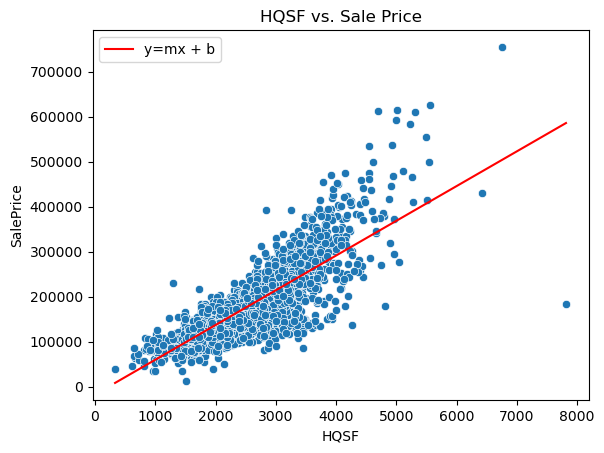

In [412]:
mydf = ames.loc[:, ['HQSF', 'SalePrice']]
sns.scatterplot(data = mydf, x = 'HQSF', y = 'SalePrice')
x_vals = np.linspace(ames[['HQSF']].min(), ames[['HQSF']].max(), 100)
y_vals = 77.21*x_vals + -17459.35
plt.plot(x_vals, y_vals, color='red', label= 'y=mx + b')

plt.title(f"HQSF vs. Sale Price")
plt.legend()
plt.show()

In [414]:
slr_detailed.loc[2,:]
#By just plotting Quality at a rate of $42,212/1 step up in quality, you can explain about 70% of the saleprices.
#The intercept is a construct for the regression. (-$78,116.74 for a '0' quality house?)

feature, r2    [OverallQual, 0.6023404865946411]
betas                      [[42212.01016287305]]
intercept                    [-78116.7427148489]
Name: 2, dtype: object

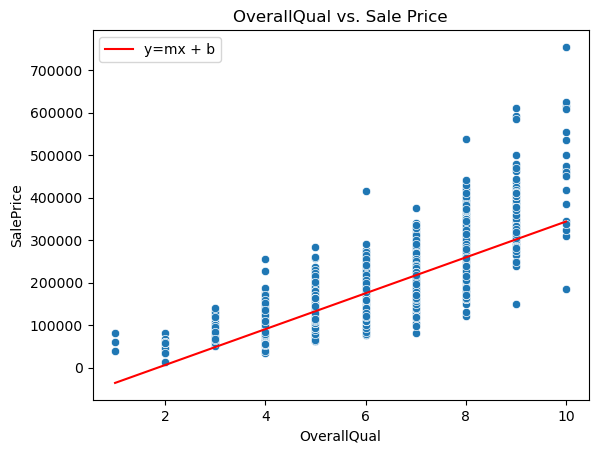

In [415]:
mydf = ames.loc[:, ['OverallQual', 'SalePrice']]
sns.scatterplot(data = mydf, x = 'OverallQual', y = 'SalePrice')
x_vals = np.linspace(ames[['OverallQual']].min(), ames[['OverallQual']].max(), 100)
y_vals = 42212*x_vals + -78116.74
plt.plot(x_vals, y_vals, color='red', label= 'y=mx + b')

plt.title(f"OverallQual vs. Sale Price")
plt.legend()
plt.show()

In [422]:
slr_detailed.loc[3, 'betas']
#df.loc[3, :]
#Neighborhood coefficients--- which of these are significant/have robust enough # of homes?

array([[-49594.6152745 , -93844.61512464, -71144.97577891,
          9963.29800816,  -4535.20386297,   2105.38593196,
        -65968.19086602,  -9985.17283102,  -6844.61531405,
         81905.38464371, -90449.01934576, -61094.61537673,
        -97603.31071507, -37096.69659938, -53352.84143073,
        -55833.90090578,  -5531.38928726, 125547.43092849,
        108626.12736957, -72266.11711479, -65502.61495082,
        -58583.82106945,  -7630.49455013,  27248.98500257,
        111585.24206483,  50720.56700612,  53558.71815794]])

### Cross-Validation

In [243]:
from sklearn.model_selection import cross_val_score

y = ames[['SalePrice']]
X = ames[['GrLivArea']]
#X = ames.drop(columns = ['PID', 'SalePrice'])

model = LinearRegression()

print(cross_val_score(model, X, y, cv=5))


[0.48839145 0.54118421 0.52138468 0.54578829 0.46720803]


In [462]:
#Implement cross-validation: not sure how to get out coefficients in this situation.
from sklearn.model_selection import cross_val_score
pd.options.display.float_format = '{:.4f}'.format

y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

cat_cols = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

big_list = []

for col in range(X.shape[1]):
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X.iloc[:, [col]])
    else:
        transformed_col = X.iloc[:, [col]]
    
    model = LinearRegression()
    
    col_name = X.columns[col]
    
    df_list = [col_name]
    
    cv_scores = cross_val_score(model, transformed_col, y, cv = 5)
    
    df_list.extend(cv_scores)
    
    df_list.extend([np.mean(cv_scores), np.std(cv_scores)])
    
    big_list.append(df_list)

big_list = sorted(big_list, key = lambda x: x[6], reverse = True)


CV_df = pd.DataFrame(big_list, columns = ['Feature', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Avg', 'Std'])
    
CV_df

,Feature,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,HQSF,0.6698,0.6822,0.7277,0.6595,0.6102,0.6699,0.0379
1,TotalSF,0.6628,0.6797,0.7244,0.6656,0.5969,0.6659,0.0410
2,OverallQual,0.6178,0.6425,0.6178,0.6094,0.6026,0.6180,0.0135
3,Neighborhood,0.5444,0.5741,0.5362,0.5419,0.5062,0.5406,0.0216
4,GrLivArea,0.4884,0.5412,0.5214,0.5458,0.4672,0.5128,0.0305
5,BsmtQual,0.5169,0.5096,0.4386,0.3883,0.4716,0.4650,0.0476
6,ExterQual,0.5460,0.5167,0.4038,0.4313,0.4264,0.4649,0.0559
7,KitchenQual,0.4772,0.5040,0.3819,0.3551,0.4666,0.4369,0.0578
8,TotalBsmtSF,0.5006,0.4278,0.4514,0.3474,0.3149,0.4084,0.0681
9,TotalBath,0.3886,0.4040,0.4241,0.3543,0.4508,0.4044,0.0325


In [463]:
CV_df['Feature']

0              HQSF
1           TotalSF
2       OverallQual
3      Neighborhood
4         GrLivArea
5          BsmtQual
6         ExterQual
7       KitchenQual
8       TotalBsmtSF
9         TotalBath
10       GarageCars
11         1stFlrSF
12       GarageArea
13        YearBuilt
14      FireplaceQu
15         FullBath
16     GarageFinish
17       Foundation
18     YearRemodAdd
19       MasVnrArea
20     TotRmsAbvGrd
21       Fireplaces
22       GarageType
23     BsmtFinType1
24       BsmtFinSF1
25        HeatingQC
26     BsmtExposure
27       MasVnrType
28      Exterior1st
29      Exterior2nd
30      LotFrontage
31         MSZoning
32       WoodDeckSF
33         LotShape
34      OpenPorchSF
35         HalfBath
36       GarageQual
37     BsmtFullBath
38       GarageCond
39       PavedDrive
40         2ndFlrSF
41       CentralAir
42          LotArea
43       HouseStyle
44         SaleType
45      GarageYrBlt
46       Electrical
47    SaleCondition
48         BsmtCond
49        RoofStyle


In [464]:
toplot = CV_df.iloc[:11,0:6]
toplot2 = CV_df.iloc[11:21, 0:6]
toplot
toplot2

,Feature,Fold1,Fold2,Fold3,Fold4,Fold5
11,1stFlrSF,0.4765,0.4208,0.4072,0.3591,0.3147
12,GarageArea,0.4316,0.3942,0.3863,0.3933,0.3637
13,YearBuilt,0.3093,0.3088,0.2568,0.2534,0.2958
14,FireplaceQu,0.3246,0.3301,0.2656,0.2229,0.2588
15,FullBath,0.2343,0.3195,0.3041,0.2738,0.2620
16,GarageFinish,0.3098,0.2876,0.2606,0.2575,0.2714
17,Foundation,0.2798,0.2799,0.2317,0.2567,0.2245
18,YearRemodAdd,0.2663,0.3014,0.2191,0.1994,0.2669
19,MasVnrArea,0.2893,0.2967,0.1271,0.1843,0.2434
20,TotRmsAbvGrd,0.2388,0.2607,0.2568,0.1918,0.1891


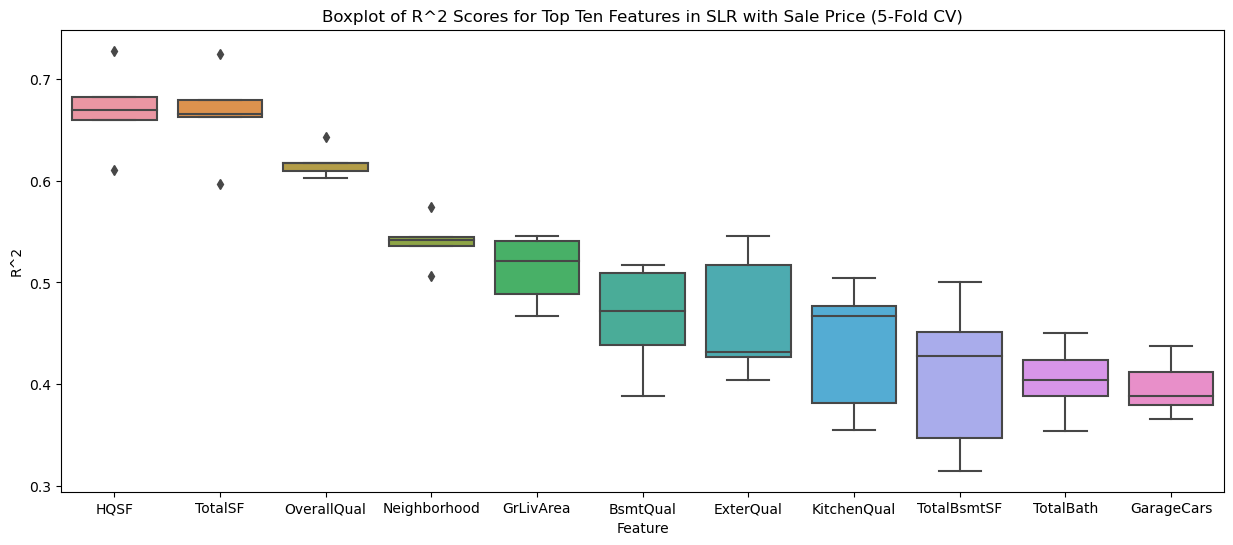

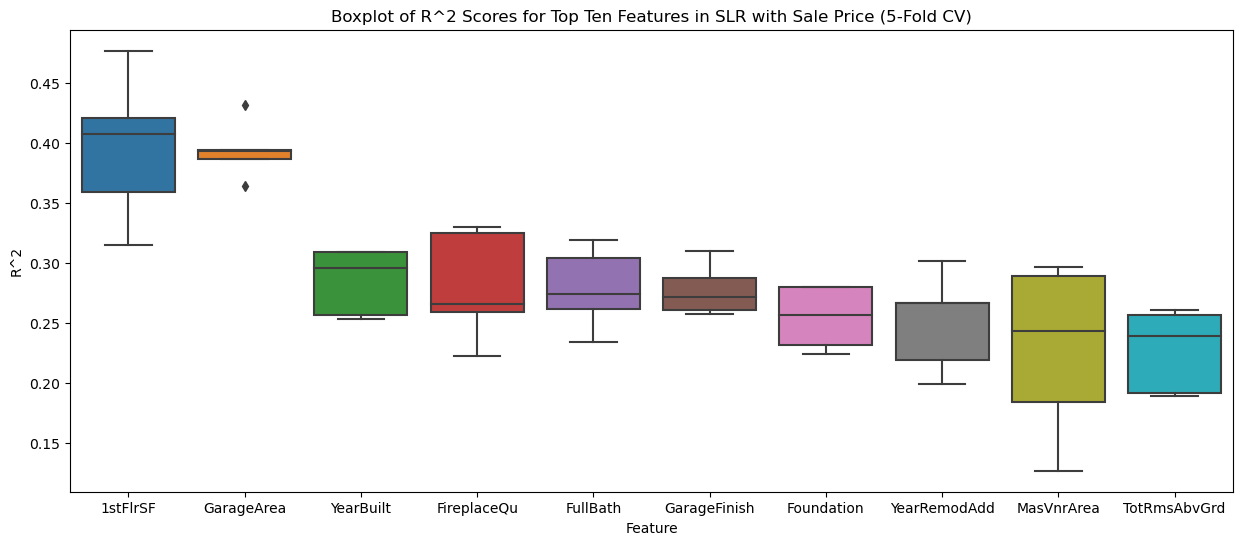

In [465]:
import seaborn as sns
import matplotlib.pyplot as plt

df_long = toplot.melt(id_vars='Feature', var_name='Fold', value_name='R^2')
df_long2 = toplot2.melt(id_vars='Feature', var_name='Fold', value_name='R^2')

plt.figure(figsize=(15, 6))
sns.boxplot(x='Feature', y='R^2', data=df_long)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature')
plt.ylabel('R^2')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Feature', y='R^2', data=df_long2)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature')
plt.ylabel('R^2')
plt.show()

# Multiple Linear Regression
With some clear insight through simple linear regression, the next step is multiple linear regression. I want to combine ~5 of these variables and create a model that is reasonably accurate (R^2 > .73) while still remaining as interpretable as possible. Could you explain the equation on the back of an envelope?

In [439]:
y = ames[['SalePrice']]
X = ames.drop(columns = ['PID', 'SalePrice'])

cat_cols = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

encoder = OneHotEncoder(drop = 'first', handle_unknown = 'ignore')

big_list = []

for col in range(X.shape[1]):
    
    if col in cat_cols:
        
        transformed_col = encoder.fit_transform(X.iloc[:, [col]])
    else:
        transformed_col = X.iloc[:, [col]]
    
    model = LinearRegression()
    
    col_name = X.columns[col]
    
    df_list = [col_name]
    
    cv_scores = cross_val_score(model, transformed_col, y, cv = 5)
    
    df_list.extend(cv_scores)
    
    df_list.extend([np.mean(cv_scores), np.std(cv_scores)])
    
    big_list.append(df_list)

big_list = sorted(big_list, key = lambda x: x[6], reverse = True)


CV_df = pd.DataFrame(big_list, columns = ['Feature', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5', 'Avg', 'Std'])
    
CV_df

,Feature,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,HQSF,0.6698,0.6822,0.7277,0.6595,0.6102,0.6699,0.0379
1,TotalSF,0.6628,0.6797,0.7244,0.6656,0.5969,0.6659,0.0410
2,OverallQual,0.6178,0.6425,0.6178,0.6094,0.6026,0.6180,0.0135
3,Neighborhood,0.5444,0.5741,0.5362,0.5419,0.5062,0.5406,0.0216
4,GrLivArea,0.4884,0.5412,0.5214,0.5458,0.4672,0.5128,0.0305
5,BsmtQual,0.5169,0.5096,0.4386,0.3883,0.4716,0.4650,0.0476
6,ExterQual,0.5460,0.5167,0.4038,0.4313,0.4264,0.4649,0.0559
7,KitchenQual,0.4772,0.5040,0.3819,0.3551,0.4666,0.4369,0.0578
8,TotalBsmtSF,0.5006,0.4278,0.4514,0.3474,0.3149,0.4084,0.0681
9,TotalBath,0.3886,0.4040,0.4241,0.3543,0.4508,0.4044,0.0325


In [440]:
top14 = CV_df['Feature'][:14].tolist()
top14
#Multicollinearity concerns- edit down to
top10 = ['OverallQual', 'HQSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']

['HQSF',
 'TotalSF',
 'OverallQual',
 'Neighborhood',
 'GrLivArea',
 'BsmtQual',
 'ExterQual',
 'KitchenQual',
 'TotalBsmtSF',
 'TotalBath',
 'GarageCars',
 '1stFlrSF',
 'GarageArea',
 'YearBuilt']

In [470]:
#pd.options.display.float_format = '{:.4f}'.format
from itertools import combinations

def my_mlr(subset_list, df):
    y = df['SalePrice']
    results_list = []

    for subset in subset_list:
        X = df[subset]

        cat_cols = [col for col in X.columns if X[col].dtype == 'object']

        if cat_cols:
            encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
            transformed_X = encoder.fit_transform(X[cat_cols])
            transformed_X = pd.DataFrame(transformed_X.toarray(), columns=encoder.get_feature_names_out())
            X = pd.concat([X.drop(columns=cat_cols), transformed_X], axis=1)

        model = LinearRegression()
        cv_scores = cross_val_score(model, X, y, cv=5)

        df_list = [subset] + list(cv_scores) + [np.mean(cv_scores), np.std(cv_scores)]
        results_list.append(df_list)

    CV_df = pd.DataFrame(results_list, columns=['Features'] + [f'Fold{i}' for i in range(1, 6)] + ['Avg', 'Std'])

    return CV_df

# Example usage
top10 = ['OverallQual', 'HQSF', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
pairs = combinations(top10, 2)
top10_pairings = [list(pair) for pair in pairs]
CV_df = my_mlr(top10_pairings, ames)
CV_df

,Features,Fold1,Fold2,Fold3,Fold4,Fold5,Avg,Std
0,"[OverallQual, HQSF]",0.7660,0.7900,0.8140,0.7849,0.7791,0.7868,0.0158
1,"[OverallQual, GarageCars]",0.6667,0.6889,0.6526,0.6830,0.6482,0.6679,0.0161
2,"[OverallQual, GarageArea]",0.6801,0.7015,0.6652,0.6989,0.6599,0.6811,0.0169
3,"[OverallQual, TotalBsmtSF]",0.7198,0.7082,0.7054,0.6772,0.6542,0.6930,0.0239
4,"[OverallQual, 1stFlrSF]",0.7262,0.7299,0.7236,0.7209,0.7072,0.7216,0.0078
5,"[OverallQual, FullBath]",0.6204,0.6666,0.6476,0.6488,0.6372,0.6441,0.0152
6,"[OverallQual, TotRmsAbvGrd]",0.6515,0.6904,0.6655,0.6671,0.6709,0.6691,0.0125
7,"[OverallQual, YearBuilt]",0.6305,0.6534,0.6164,0.6288,0.6227,0.6304,0.0126
8,"[OverallQual, YearRemodAdd]",0.6269,0.6555,0.6217,0.6136,0.6184,0.6272,0.0148
9,"[HQSF, GarageCars]",0.7215,0.7129,0.7708,0.7051,0.6818,0.7184,0.0293


In [471]:
pairs_toplot = CV_df.iloc[:11,0:6]
pairs_toplot2 = CV_df.iloc[11:21, 0:6]

pairs_toplot

,Features,Fold1,Fold2,Fold3,Fold4,Fold5
0,"[OverallQual, HQSF]",0.7660,0.7900,0.8140,0.7849,0.7791
1,"[OverallQual, GarageCars]",0.6667,0.6889,0.6526,0.6830,0.6482
2,"[OverallQual, GarageArea]",0.6801,0.7015,0.6652,0.6989,0.6599
3,"[OverallQual, TotalBsmtSF]",0.7198,0.7082,0.7054,0.6772,0.6542
4,"[OverallQual, 1stFlrSF]",0.7262,0.7299,0.7236,0.7209,0.7072
5,"[OverallQual, FullBath]",0.6204,0.6666,0.6476,0.6488,0.6372
6,"[OverallQual, TotRmsAbvGrd]",0.6515,0.6904,0.6655,0.6671,0.6709
7,"[OverallQual, YearBuilt]",0.6305,0.6534,0.6164,0.6288,0.6227
8,"[OverallQual, YearRemodAdd]",0.6269,0.6555,0.6217,0.6136,0.6184
9,"[HQSF, GarageCars]",0.7215,0.7129,0.7708,0.7051,0.6818


In [474]:
df_long = pairs_toplot.melt(id_vars='Features', var_name='Fold', value_name='R^2')
df_long2 = pairs_toplot2.melt(id_vars='Features', var_name='Fold', value_name='R^2')

df_long['Features'] = df_long['Features'].apply(lambda x: ', '.join(map(str, x)))
df_long2['Features'] = df_long2['Features'].apply(lambda x: ', '.join(map(str, x)))

df_long2

,Features,Fold,R^2
0,"HQSF, TotalBsmtSF",Fold1,0.6650
1,"HQSF, 1stFlrSF",Fold1,0.6697
2,"HQSF, FullBath",Fold1,0.6699
3,"HQSF, TotRmsAbvGrd",Fold1,0.6733
4,"HQSF, YearBuilt",Fold1,0.7340
5,"HQSF, YearRemodAdd",Fold1,0.7167
6,"GarageCars, GarageArea",Fold1,0.4568
7,"GarageCars, TotalBsmtSF",Fold1,0.6339
8,"GarageCars, 1stFlrSF",Fold1,0.6158
9,"GarageCars, FullBath",Fold1,0.4766


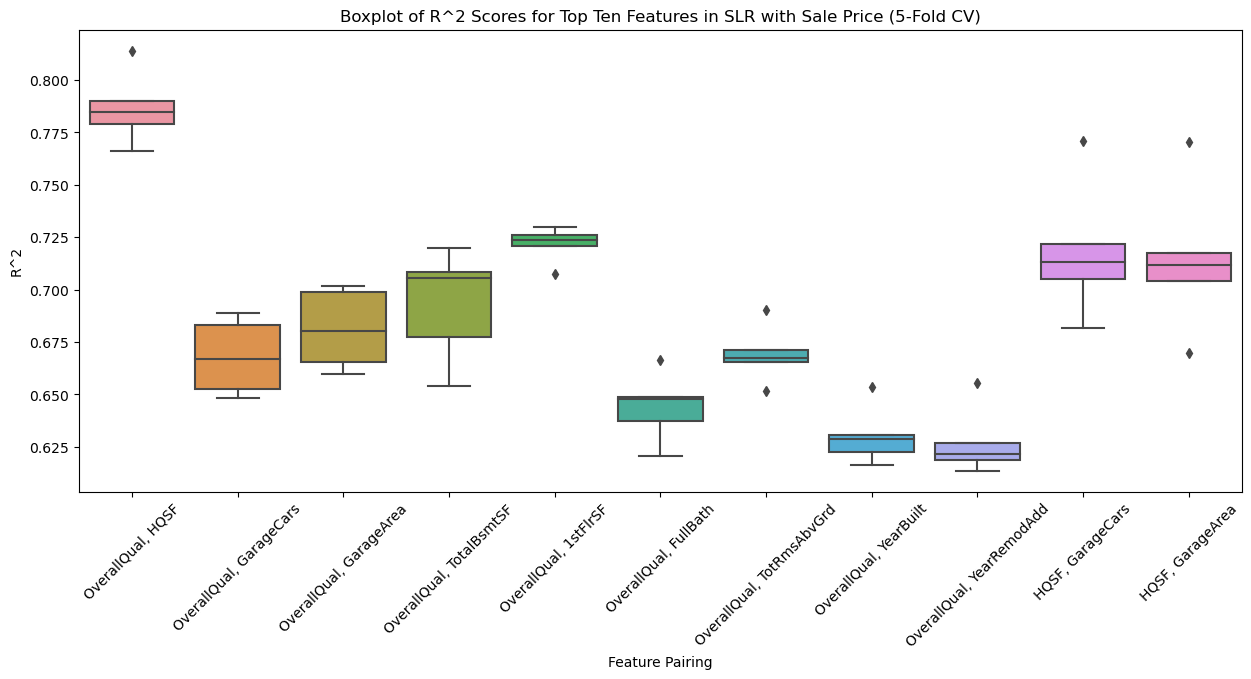

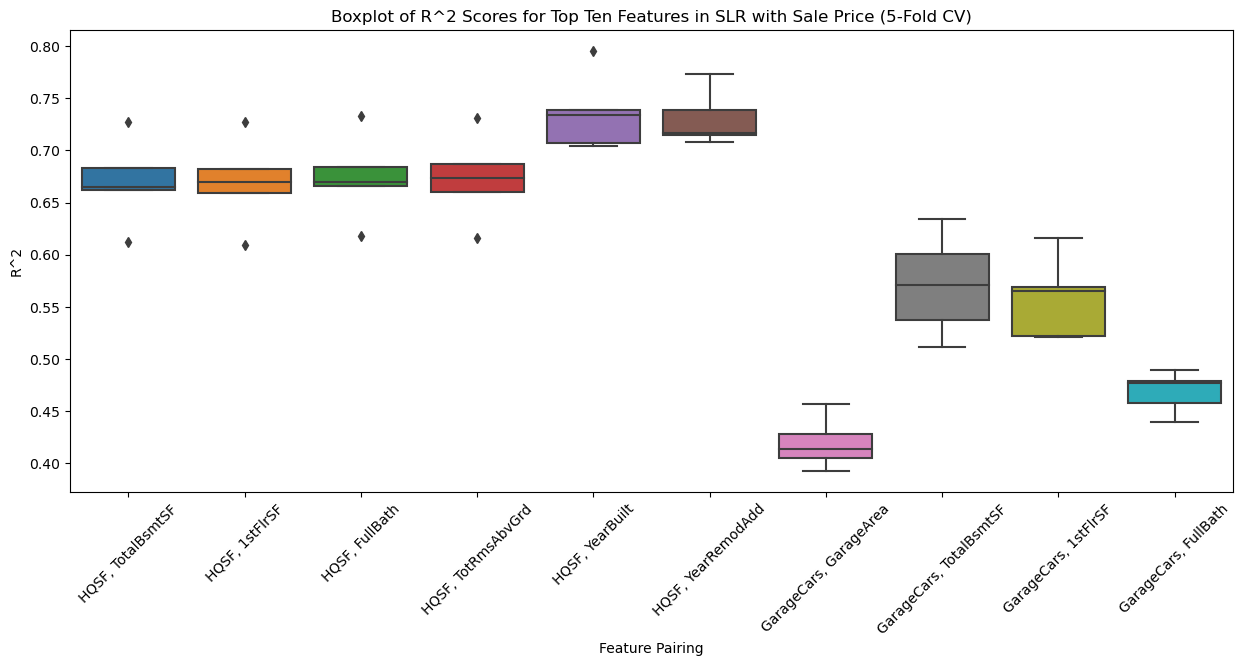

In [475]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Features', y='R^2', data=df_long)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature Pairing')
plt.ylabel('R^2')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='Features', y='R^2', data=df_long2)
plt.title('Boxplot of R^2 Scores for Top Ten Features in SLR with Sale Price (5-Fold CV)')
plt.xlabel('Feature Pairing')
plt.ylabel('R^2')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()